# LightGBM example with user-specified hyperparameters

**Example using the lgbm function in the PyMLR module**

The **lgbm** function provides output of fitted regression model and summary statistics using the lightgbm LGBMRegressor.

This example shows how to check the cross-validation of the model with independent training and testing data subsets before fitting the final model with all of the data.

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes dataset by sklearn

Before running this notebook, first install the PyMLR module in your environment, if it is not already installed, using the following line in the next cell:

In [1]:
# !pip install git+https://github.com/gjpelletier/PyMLR.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

In the next step, we will specify values for the hyper-parameters for LightGBM in the kwargs dictionary, and then we will fit the model using the training data.

After this training step is completed, proceed to the next step to check how well the predictions from the training data match the predictions using the testing data.

If the predictions from the training and testing data are too different from each other, keep trying different values in the kwargs dictionary in the training step. Repeat the training and testing steps until their predictions match each other as closely as possible.

Fitting LGBMRegressor model, please wait ...


LGBMRegressor goodness of fit to training data in model_outputs['stats']:

| Statistic          |   LGBMRegressor |
|:-------------------|----------------:|
| R-squared          |        0.677395 |
| MSE                |     1960.28     |
| RMSE               |       44.275    |
| Explained Variance |        0.677395 |
| MAE                |       36.3024   |
| Max Error          |      134.182    |
| MAPE               |        0.319384 |
| MSLE               |        0.11994  |
| n_samples          |      353        |

Done
Time elapsed: 8.48 sec



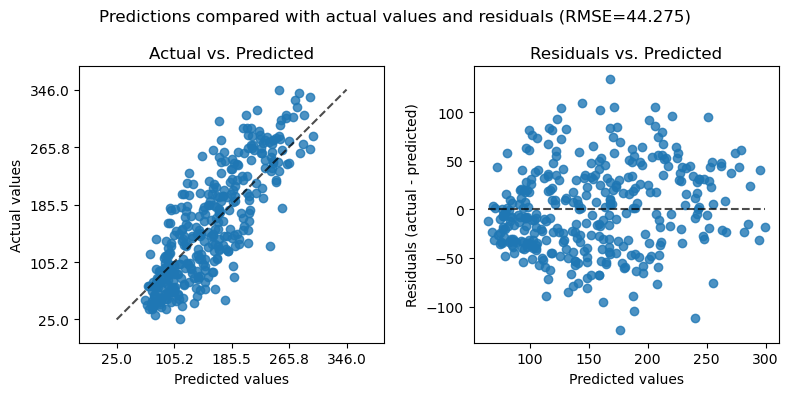

In [5]:
# Specify the kwargs dictionary of hyper-parameters
kwargs = {
    'objective': 'regression', 
    'num_leaves': 5,
    'learning_rate': 0.05, 
    'n_estimators': 100,
    'max_bin': 200, 
    'bagging_fraction': 0.5,
    'bagging_freq': 5, 
    'bagging_seed': 7,
    'feature_fraction': 0.2,
    'feature_fraction_seed': 42,
    'verbosity': -1}                                    

# Fit the model with the training data
from PyMLR import lgbm
train_model, train_output = lgbm(X_train, y_train, **kwargs)

## Test the model with the testing data subset

In the next step we will check how well the predictions from fitted model match samples from the testing data. To standardize the testing data we will use the same preprocess_result scaler that was used to standardize the training data to avoid data leakage between the training and testing data. We will also use the same optimized selected features that were determined during the training.


Goodness of fit to testing data in result['metrics']:

| Statistic          |   Regressor |
|:-------------------|------------:|
| R-squared          |    0.508142 |
| MSE                | 2605.94     |
| RMSE               |   51.0484   |
| Explained Variance |    0.508418 |
| MAE                |   40.7684   |
| Max Error          |  146.165    |
| MAPE               |    0.368974 |
| MSLE               |    0.158931 |
| n_samples          |   89        |



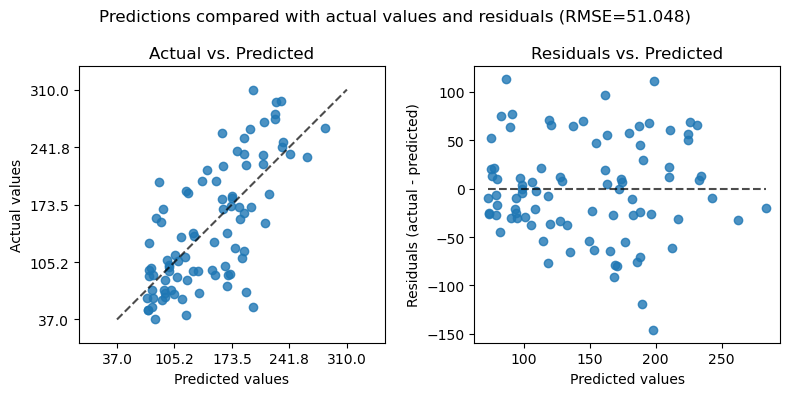

In [6]:
from PyMLR import test_model
test_output = test_model(train_model, X_test, y_test, 
    preprocess_result= train_output['preprocess_result'],
    selected_features= train_output['selected_features'])

# save the plot of predictions vs actual and residuals
test_output['fig'].savefig("LGBMRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

In the next step we will use the optimum hyperparameters and selected features from the training model and fit the model using all of the X and y data. The standard scaler and encoder are recalculated by default (the user also has the option to input a previously calculated scaler/encoder from a previous preprocess_result).

Fitting LGBMRegressor model, please wait ...


LGBMRegressor goodness of fit to training data in model_outputs['stats']:

| Statistic          |   LGBMRegressor |
|:-------------------|----------------:|
| R-squared          |        0.657513 |
| MSE                |     2030.91     |
| RMSE               |       45.0656   |
| Explained Variance |        0.657513 |
| MAE                |       36.5559   |
| Max Error          |      138.792    |
| MAPE               |        0.324942 |
| MSLE               |        0.124473 |
| n_samples          |      442        |

Done
Time elapsed: 11.05 sec



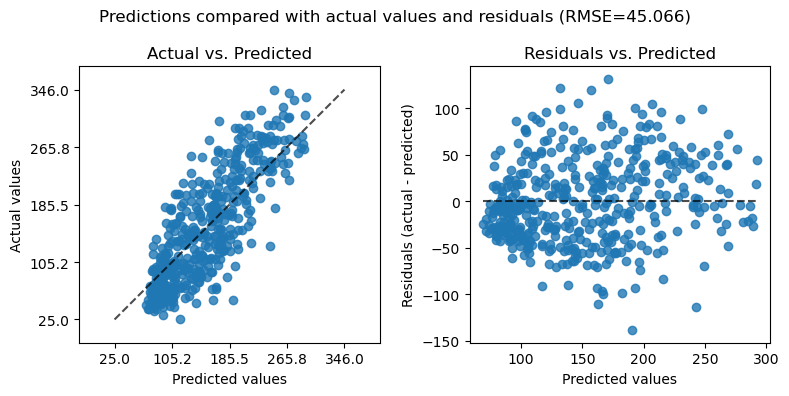

In [7]:
from PyMLR import lgbm
final_model, final_output = lgbm(X, y, **kwargs)

## User instructions

In [9]:
help(lgbm)

Help on function lgbm in module PyMLR:

lgbm(X, y, **kwargs)
    Linear regression with LightGBM
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    03-June-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        verbose= 'on' (default) or 'off'
        preprocess= True,           # Apply OneHotEncoder and StandardScaler
        preprocess_result= None,    # dict of the following result from
                                    # preprocess_train if available:
                                    # - encoder          (OneHotEncoder)
                                    # - scaler           (StandardScaler)
                                    # - categorical_cols (categorical co